# Kombinált technikák használata

In [1]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
df = pd.read_csv("./_data/DataSet_Hitelbiralat_OnlyNum.csv")

In [4]:
len(df)

50000

In [5]:
y_col = "Age"

<AxesSubplot:>

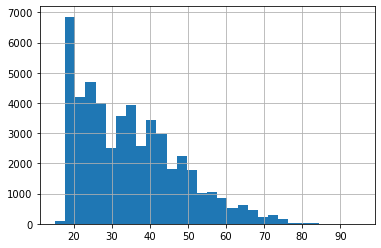

In [6]:
df[y_col].hist(bins=30)

In [7]:
X_cols=list(df.columns)[1:-1]

In [8]:
X_cols.remove(y_col)

In [9]:
train_df=df.iloc[:25000,:].copy()
test_df =df.iloc[25000:,:].copy()

In [11]:
# vizsgaljuk a modell pontossagat (MAE, RMSE) kulonbozo modellekkel
# linreg
# dontesi fa 4, 10 melyseggel (DecisionTreeRegressor, max_depth, random_state=42)
# random forest 4, 10 melyseggel (RandomForestRegressor, max_depth, random_state=42)
# random forest 4, 10 melyseggel 500 fa(RandomForestRegressor, max_depth, n_estimators, random_state=42)
# gbm 4 melyseggel, 100, learningrate=1, 0.1)
# gbm 4 melyseggel, 500 fa, learningrate=1, 0.1)
# gbm 10 melyseggel, 100, learningrate=1, 0.1)
# gbm 10 melyseggel, 500 fa, learningrate=1, 0.1)
# nn_2 (MLPRegressor, hidden_layer_sizes=(2,), random_state=1)
# nn_5_3 (MLPRegressor random_state=1, hidden_layer_sizes=(5,3),
#        learning_rate='adaptive', activation='tanh', max_iter=2000)

In [11]:
model_dict = {
    'linreg': LinearRegression(),
    'dct4': DecisionTreeRegressor(max_depth=4, random_state=1),
    'dct10': DecisionTreeRegressor(max_depth=10, random_state=1),
    'rf4': RandomForestRegressor(max_depth=4, random_state=1),
    'rf10': RandomForestRegressor(max_depth=10, random_state=1),
    'rf4-500': RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1),
    'rf10-500': RandomForestRegressor(n_estimators=500, max_depth=10, random_state=1),
    'gbm4': GradientBoostingRegressor(max_depth=4, random_state=1, learning_rate=1),
    'gbm4-500': GradientBoostingRegressor(max_depth=4, n_estimators=500, random_state=1, learning_rate=1),
    'gbm4-500_01': GradientBoostingRegressor(max_depth=4, n_estimators=500, random_state=1, learning_rate=0.1),
    'gbm10': GradientBoostingRegressor(max_depth=10, random_state=1, learning_rate=1),
    'gbm10-500': GradientBoostingRegressor(max_depth=10, n_estimators=500, random_state=1, learning_rate=1),
    'gbm10-500_01': GradientBoostingRegressor(max_depth=10, n_estimators=500, random_state=1, learning_rate=0.1),
    'nn_2': MLPRegressor(random_state=1, hidden_layer_sizes=(2,)),
    'nn_5_3': MLPRegressor(random_state=1,
                  hidden_layer_sizes=(5,3), learning_rate='adaptive', activation='tanh', max_iter=2000)
}

In [37]:
result_dict = {}
for model_name, model in model_dict.items():
    model.fit(train_df.loc[:, X_cols], train_df.loc[:, y_col])
    pred = model.predict(test_df.loc[:, X_cols])
    mae = abs(test_df.loc[:, y_col] - pred).mean()
    rmse = np.sqrt(((test_df.loc[:, y_col] - pred)**2).mean())
    result_dict[model_name] = {}
    result_dict[model_name]['mae'] = np.round(mae, 1)
    result_dict[model_name]['rmse'] = np.round(rmse, 1)
    print(f'Model: {model_name}, MAE: {mae}, RMSE: {rmse}')

Model: linreg, MAE: 8.750543949919061, RMSE: 11.08087691532302
Model: dct4, MAE: 7.537058096078051, RMSE: 9.529409548731916
Model: dct10, MAE: 6.738295767272124, RMSE: 8.954089200356677
Model: rf4, MAE: 7.452970425818023, RMSE: 9.431533069580931
Model: rf10, MAE: 6.454219221278906, RMSE: 8.48208622335665
Model: rf4-500, MAE: 7.4430550362224865, RMSE: 9.420541692899114
Model: rf10-500, MAE: 6.447925002133919, RMSE: 8.470093991624937
Model: gbm4, MAE: 6.55858534897879, RMSE: 8.689254574021058
Model: gbm4-500, MAE: 7.189995363984035, RMSE: 9.57617277773792
Model: gbm4-500_01, MAE: 6.0993967316603905, RMSE: 8.028014668469044
Model: gbm10, MAE: 8.799580667133135, RMSE: 11.744660112830955
Model: gbm10-500, MAE: 8.823829943777687, RMSE: 11.77209161806465
Model: gbm10-500_01, MAE: 6.408982275526362, RMSE: 8.51663193736033
Model: nn_2, MAE: 10.231967518936804, RMSE: 13.432016226071363
Model: nn_5_3, MAE: 10.774807128396931, RMSE: 13.121041727608976


In [46]:
plot_dict = {k:v['mae'] for k, v in result_dict.items()}

<BarContainer object of 15 artists>

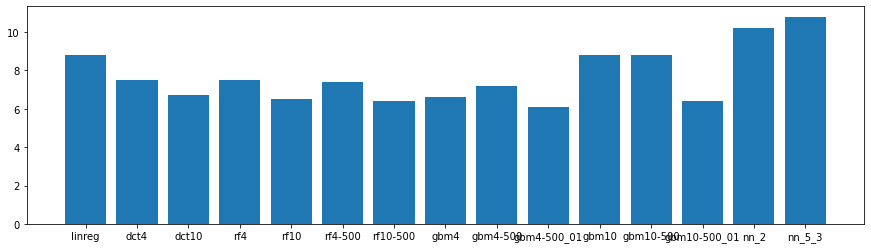

In [50]:
plt.figure(figsize=(15, 4))
plt.bar(plot_dict.keys(), plot_dict.values())

In [58]:
sorted_dict = dict(sorted(plot_dict.items(), key=lambda x: x[1]))

<BarContainer object of 15 artists>

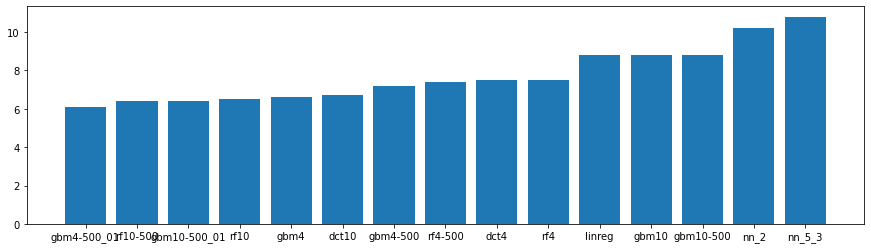

In [59]:
plt.figure(figsize=(15, 4))
plt.bar(sorted_dict.keys(), sorted_dict.values())